In [1]:
%matplotlib inline
import sys, re
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt
pd.options.display.max_rows = 4000
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from os import path
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
import unicodedata
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder,TrigramCollocationFinder, TrigramAssocMeasures
from operator import itemgetter
nltk.download('punkt')
from sklearn import preprocessing
pd.options.display.max_rows = 4000

[nltk_data] Downloading package stopwords to C:\Users\Vishaal
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Vishaal
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Vishaal
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
survey_data = pd.read_csv(r'G:\Shared drives\MediSprout\vishaal\MediSprout-notebooks\NLP Analysis\survey_data.csv')
survey_data

,id,source,visit_id,is_satisfied,rating,feedback,member_healthcare_org_rel_id,patient_id,created_on,updated_on,is_mobile,platform,client_name,client_version,screen_size,connection_type,build_version,n_minute_duration
0,1,Clinician,17486,1,NaN,NaN,676,647.0,2019-03-19 17:56:05,2019-03-19 17:56:05,0,NaN,NaN,NaN,NaN,NaN,NaN,1.6667
1,2,Clinician,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:56,2019-03-20 17:35:56,0,NaN,NaN,NaN,NaN,NaN,NaN,22.7667
2,3,Patient,17488,1,NaN,NaN,322,389.0,2019-03-20 17:35:57,2019-03-20 17:35:57,0,NaN,NaN,NaN,NaN,NaN,NaN,22.7667
3,4,Patient,17490,0,NaN,NaN,237,87.0,2019-03-20 18:21:10,2019-03-20 18:21:10,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0500
4,5,Clinician,17490,0,NaN,shut down mid session,237,87.0,2019-03-20 18:21:38,2019-03-20 18:21:38,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161900,161901,Clinician,269699,1,3.0,Poor audio and visual most of the session.,67569,108227.0,2020-10-07 23:02:03,2020-10-07 23:02:03,1,,NaN,NaN,NaN,NaN,NaN,59.0500
161901,161902,Patient,269711,1,5.0,NaN,4179,15992.0,2020-10-07 23:05:31,2020-10-07 23:05:31,1,,NaN,NaN,NaN,NaN,NaN,22.9667
161902,161903,Patient,269510,0,5.0,NaN,60228,47688.0,2020-10-07 23:19:02,2020-10-07 23:19:02,0,Mac OS X 10_15_6,Chrome,85.0.4183.121,1440 x 900,NaN,NaN,44.6167
161903,161904,Patient,267236,1,5.0,NaN,65974,190019.0,2020-10-07 23:20:22,2020-10-07 23:20:22,1,,NaN,NaN,NaN,NaN,NaN,4.8500


In [3]:
survey_data['rating'].dropna().astype(int)

103622    5
103640    5
103642    5
103653    4
103656    4
         ..
161900    3
161901    5
161902    5
161903    5
161904    5
Name: rating, Length: 33412, dtype: int32

In [4]:
def wordcloud_build(txt_input):
    WNL = nltk.WordNetLemmatizer()
    def prepareStopWords():
 
        stopwordsList = []
 
        #Below are some default stopwords
        stopwordsList.append('dont')
        stopwordsList.append('didnt')
        stopwordsList.append('doesnt')
        stopwordsList.append('cant')
        stopwordsList.append('couldnt')
        stopwordsList.append('couldve')
        stopwordsList.append('im')
        stopwordsList.append('ive')
        stopwordsList.append('isnt')
        stopwordsList.append('theres')
        stopwordsList.append('wasnt')
        stopwordsList.append('wouldnt')
        stopwordsList.append('a')
        stopwordsList.append('also')
        stopwordsList.append('like')
        stopwordsList.append('app')
        stopwordsList.append('apps')
        stopwordsList.append('-')
        stopwordsList.append('_')
        stopwordsList.append('“')
        stopwordsList.append('”')
        stopwordsList.append('call')
        stopwordsList.append('good')
        stopwordsList.append('audio')
        stopwordsList.append('hear')
        stopwordsList.append('see')
        stopwordsList.append('video')
        stopwordsList.append('connection')
        stopwordsList.append('great')
        stopwordsList.append('successful')
        stopwordsList.append('thank')
        stopwordsList.append('you')
        stopwordsList.append('excellent')
        stopwordsList.append('best')
        stopwordsList.append('perfect')
        return stopwordsList

    rawText = txt_input.lower()

    rawText = rawText.replace("'", "")
    tokens = nltk.word_tokenize(rawText)
    text = nltk.Text(tokens)

    stopWords = prepareStopWords()

    # Remove the punctuations, they are not wanted in your wordcloud
    text_content = [''.join(re.split("[.,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]
    text_content = [word for word in text_content if word not in stopWords]

    # Remove the empty entries
    text_content = [s for s in text_content if len(s) != 0]

    # lemmatize the string
    text_content = [WNL.lemmatize(t) for t in text_content]

    # Allocate the weight of the tri-grams. I choose to use trigrams because in this case it generates more insights than bi-grams, simply replace "Tri" with "Bi" if you want to play with bi-grams.
    finder = TrigramCollocationFinder.from_words(text_content)
    Trigram_measures = TrigramAssocMeasures()
    scored = finder.score_ngrams(Trigram_measures.raw_freq)

    # Sort it based on weights
    scoredList = sorted(scored, key=itemgetter(1), reverse=True)

    #Initiate a list of tri-grams with their weight

    word_dict = {}

    listLen = len(scoredList)

    # Assign values in to the word_dict
    for i in range(listLen):
        word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]

    #Set the parameters of the wordcloud image
    WC_height = 500
    WC_width = 1000
    WC_max_words = 100

    wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)

    wordCloud.generate_from_frequencies(word_dict)
    
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

*Trigram WordCloud - general*

In [5]:
fixed_feedback = survey_data.query("feedback != 'Enter FeedBack'")['feedback']

In [6]:
raw_list = pd.Series([row for row in fixed_feedback.dropna()])
raw_feedback_counts = raw_list.value_counts().to_frame().reset_index() \
.rename(columns={0: 'counts', 'index':'feedback'}).query('counts == 1')
raw_feedback_counts

,feedback,counts
1433,patient video would not load for 15 mins,1
1434,worked fine\n\n,1
1435,Jessica Gelman was fantastic,1
1436,Very good meeting. Very thorough and clear. ...,1
1437,The dr did a great job but given a choice I wo...,1
...,...,...
26794,it was very laggy and very slow and if i doubl...,1
26795,The session was ended at 90 minutes even thoug...,1
26796,My experience was excellent.,1
26797,still not working,1


In [7]:
raw_top_ten = raw_list.value_counts().head(10)
raw_top_ten

Successful     296
excellent      222
Successful     153
No             148
Echo           136
No audio       101
Excellent       95
Great           86
no audio        79
Good            75
dtype: int64

In [8]:
raw_feedback_1 = ''
for row in raw_feedback_counts['feedback']:
    raw_feedback_1 = raw_feedback_1 + row

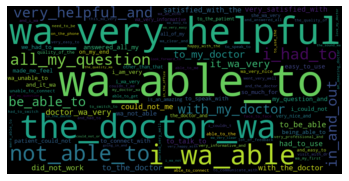

In [9]:
#raw feedback at value_count == 1
wordcloud_build(raw_feedback_1)

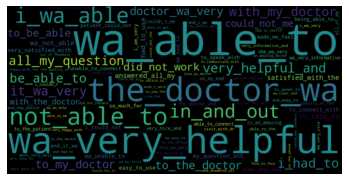

In [10]:
#figure out how to lemmatize better
raw_feedback = ''
for row in fixed_feedback.dropna():
    raw_feedback = raw_feedback + row

wordcloud_build(raw_feedback)

In [11]:
satisfied_feedback = survey_data.query("feedback != 'Enter FeedBack' & is_satisfied == 1")['feedback']

*Trigram wordcloud - satisfied*

In [12]:
satisfied_str = ''
for row in satisfied_feedback.dropna():
    satisfied_str = satisfied_str + row

In [13]:
satisfied_list = pd.Series([row for row in satisfied_feedback.dropna()])
sat_feedback_counts = satisfied_list.value_counts().to_frame().reset_index() \
.rename(columns={0: 'counts', 'index':'feedback'}).query('counts == 1')
sat_feedback_counts

,feedback,counts
898,Very helpful. Enjoyed The Session.,1
899,amazing! thank you Dr. Youkeles and Westmed!,1
900,The video was easy to use and the visit with D...,1
901,Horrible echo of my voice,1
902,Everything went fine,1
...,...,...
18968,The virtual visit was great. The audio is a bi...,1
18969,Call kept breaking up so it was hard to hear e...,1
18970,I appreciate the service I was able to video w...,1
18971,Thank You.,1


In [14]:
satisfied_top_ten = satisfied_list.value_counts(normalize=True).head(10).to_frame().reset_index()\
.rename(columns={0:'counts', 'index':'feedback'})
satisfied_top_ten

,feedback,counts
0,Successful,0.012644
1,excellent,0.008628
2,Successful,0.006535
3,No,0.006066
4,Excellent,0.004058
5,Great,0.003673
6,Good,0.003204
7,Thank you,0.003161
8,Good connection,0.002947
9,perfect,0.002776


In [15]:
satisfied_str_1 = ''
for row in sat_feedback_counts['feedback']:
    satisfied_str_1 = satisfied_str_1 + row

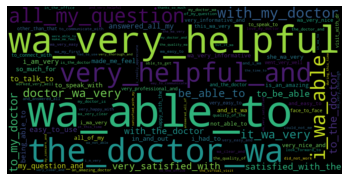

In [16]:
#satisfied feedback at value_count == 1
wordcloud_build(satisfied_str_1)

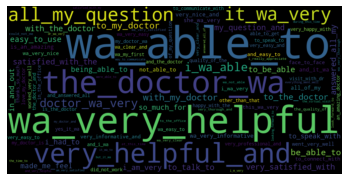

In [17]:
wordcloud_build(satisfied_str)

*Trigram wordcloud - unsatisfied*

In [18]:
unsatisfied_feedback = survey_data.query("feedback != 'Enter FeedBack' & is_satisfied == 0")['feedback']

In [19]:
unsatisfied_feedback.dropna().apply(len).value_counts(ascending=True)

315       1
267       1
283       1
299       1
307       1
503       1
371       1
379       1
427       1
523       1
1115      1
212       1
316       1
324       1
332       1
340       1
259       1
235       1
219       1
211       1
353       1
361       1
449       1
1161      1
242       1
250       1
274       1
364       1
290       1
330       1
346       1
386       1
394       1
610       1
642       1
810       1
298       1
396       1
428       1
452       1
446       1
470       1
486       1
1094      1
151       1
199       1
223       1
422       1
239       1
255       1
263       1
271       1
303       1
383       1
407       1
431       1
247       1
305       1
326       1
294       1
500       1
205       1
245       1
253       1
269       1
285       1
301       1
310       1
357       1
413       1
485       1
174       1
198       1
206       1
254       1
262       1
397       1
273       1
1047      1
536       1
368       1
376       1
448       1
264 

In [20]:
unsatisfied_str = ''
for row in unsatisfied_feedback.dropna():
    unsatisfied_str = unsatisfied_str + row

In [21]:
unsatisfied_list = []
for row in unsatisfied_feedback.dropna():
    unsatisfied_list.append(row)
unsatisfied_list = pd.Series(unsatisfied_list)
unsatisfied_list.value_counts().tail(200)

Unable to connect with patient\n\n                                                                                                                                                                                                                                      1
video and audio 'stuttered'.                                                                                                                                                                                                                                            1
Patient could not figure out how to turn on camera for 25 minutes. Different modality to be used\n                                                                                                                                                                      1
The quality was terrible                                                                                                                                                                                  

In [22]:
unsatisfied_list = pd.Series([row for row in unsatisfied_feedback.dropna()])
unsat_feedback_counts = unsatisfied_list.value_counts().to_frame().reset_index() \
.rename(columns={0: 'counts', 'index':'feedback'}).query('counts == 1')
unsat_feedback_counts

,feedback,counts
538,"Very good. I love Dr Brinson, and she was just...",1
539,It has always been a pleasure speaking to Dr.W...,1
540,Lost it.,1
541,Patient never came on. Called and left message,1
542,"Awful, terrific feedback and echo. Very hard f...",1
...,...,...
8247,"Lots of static, could not hear patient\n",1
8248,I have had 11 patients today. So far out of th...,1
8249,Loud echo of my voice w 1-second delay through...,1
8250,Poor visualization\nEchoing,1


In [23]:
unsatisfied_top_ten = unsatisfied_list.value_counts(normalize=True).head(10).to_frame().reset_index()\
.rename(columns={0:'counts', 'index':'feedback'})
unsatisfied_top_ten

,feedback,counts
0,Echo,0.009382
1,no audio,0.007157
2,No audio,0.006674
3,No video,0.004352
4,Poor audio,0.004159
5,No sound,0.004062
6,no video,0.003579
7,echo,0.003482
8,No connection,0.002902
9,no sound,0.002805


In [24]:
raw_feedback = survey_data['feedback'].dropna().to_frame().reset_index()\
.rename(columns={'index':'raw_index'})
raw_feedback['audio_issue'] = ''
raw_feedback['video_issue'] = ''
raw_feedback['connection_issue'] = ''
raw_feedback

,raw_index,feedback,audio_issue,video_issue,connection_issue
0,4,shut down mid session,,,
1,6,Brittney is great at what she does for the cit...,,,
2,7,shut down midway through session again today.,,,
3,11,None at this time.,,,
4,16,This was a test training run with a new dietit...,,,
...,...,...,...,...,...
38276,161880,Great!!,,,
38277,161889,No great job with this app it's great!,,,
38278,161893,Couldn’t hear doctor,,,
38279,161896,Dr. Glass is amazing,,,


In [25]:
unsatisfied_feedback = survey_data[survey_data['is_satisfied'] == 0]['feedback']\
.dropna().to_frame().reset_index().rename(columns={'index':'raw_index'})
unsatisfied_feedback

,raw_index,feedback
0,4,shut down mid session
1,16,This was a test training run with a new dietit...
2,17,video not working
3,18,3rd time kicked off in past 5 minutes
4,32,not working
...,...,...
10334,161781,can't see patient
10335,161836,I can't see the patient
10336,161860,Call was great. No issues whatsoever.
10337,161880,Great!!


In [40]:
satisfied_feedback = survey_data[survey_data['is_satisfied'] == 1]['feedback']\
.dropna().to_frame().reset_index().rename(columns={'index':'raw_index'})
satisfied_feedback

,raw_index,feedback
0,6,Brittney is great at what she does for the cit...
1,7,shut down midway through session again today.
2,11,None at this time.
3,25,Great call
4,30,"This work every well, video and sound was clea..."
...,...,...
27937,161864,I love that now there’s video chat and you can...
27938,161875,Thank you.
27939,161893,Couldn’t hear doctor
27940,161896,Dr. Glass is amazing


In [26]:
unsatisfied_feedback['issue_type'] = unsatisfied_feedback.apply(lambda row: categorize_feedback(row), axis=1)
unsatisfied_feedback

NameError: name 'categorize_feedback' is not defined

*unsatisfied trigrams*
(could, see, hear)            68
(patient, could, see)         64
(patient, could, hear)        63
(could, see, patient)         60
(poor, video, quality)        45
(could, hear, patient)        43
(poor, sound, quality)        42
(poor, audio, quality)        41
(see, hear, patient)          38
(video, kept, freezing)       38
(unable, connect, patient)    37
(poor, audio, video)          33
(unable, see, patient)        27
(audio, didnt, work)          25
(patient, couldnt, hear)      25
(couldnt, hear, patient)      22
(patient, unable, connect)    22
(see, patient, video)         22
(patient, unable, see)        21
(sound, quality, poor)        21

*satisfied trigrams*
(everything, went, well)     79
(video, call, great)         77
(call, went, well)           66
(great, video, call)         58
(best, doctor, ever)         54
(satisfied, video, call)     49
(video, call, went)          44
(video, call, good)          41
(visit, went, well)          34
(thank, much, dr)            34
(able, see, doctor)          32
(made, feel, comfortable)    30
(feel, much, better)         30
(video, call, doctor)        28
(went, well, thank)          28
(could, see, hear)           27
(keep, good, work)           25
(video, call, dr)            25
(great, service, thank)      24
(way, see, doctor)           24

In [61]:
def is_audio_issue(row):
    
    feedback = row['feedback'].lower()
    
    audio = r'echo|sound|audio|hear\w*|quality'
    
    if bool(re.search(audio, feedback)) == True:
        return 'True'
    else:
        return 'False'

In [62]:
def is_video_issue(row):
    
    feedback = row['feedback']
    
    video = r'[Vv]ideo|[Vv]isual|[Qq]uality|[Ss]ee'
    
    if bool(re.search(video, feedback)) == True:
        return 'True'
    else:
        return 'False'
    
#call .lower()

In [75]:
def is_connection_issue(row):
    
    feedback = row['feedback']
    
    connection = r'[Cc]onn\w*|[Dd]isconn\w*|[Dd]rop\w*|[Uu]nable'
    
    if bool(re.search(connection, feedback)) == True:
        return 'True'
    else:
        return 'False'
    
#call .lower()

In [64]:
unsatisfied_feedback['connection_issue'] = unsatisfied_feedback.apply(lambda row: is_connection_issue(row), axis=1)
unsatisfied_feedback['video_issue'] = unsatisfied_feedback.apply(lambda row: is_video_issue(row), axis=1)
unsatisfied_feedback['audio_issue'] = unsatisfied_feedback.apply(lambda row: is_audio_issue(row), axis=1)
unsatisfied_feedback.head(100)

,raw_index,feedback,connection_issue,video_issue,audio_issue
0,4,shut down mid session,False,False,False
1,16,This was a test training run with a new dietit...,False,False,False
2,17,video not working,False,True,False
3,18,3rd time kicked off in past 5 minutes,False,False,False
4,32,not working,False,False,False
5,35,"no audio, weird background noise",False,False,True
6,57,We were unsuccessful to have the video call. :(,False,True,False
7,115,I was hearing my own audio on the other end as...,False,False,True
8,124,"Patient could only hear me, not see me.",False,True,True
9,201,Video feed kept disconnecting. Repeatedly tel...,True,True,False


In [65]:
unsatisfied_str_1 = ''
for row in unsat_feedback_counts['feedback']:
    unsatisfied_str_1 = unsatisfied_str_1 + row

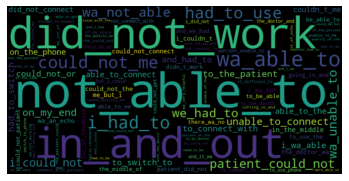

In [66]:
#unsatisfied feedback at value count == 1
wordcloud_build(unsatisfied_str_1)

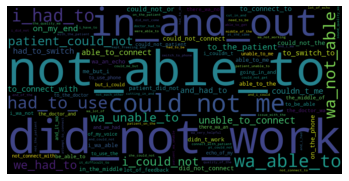

In [67]:
wordcloud_build(unsatisfied_str)

In [68]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text).lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [69]:
unsatisfied_words = basic_clean(''.join(str(unsatisfied_feedback.query("feedback != 'Enter FeedBack'")['feedback'].dropna().tolist())))
words[:20]

['shut',
 'mid',
 'session',
 'test',
 'training',
 'run',
 'new',
 'dietitian',
 'issue',
 'follow',
 'separately',
 'via',
 'email',
 'thanks',
 'video',
 'working',
 '3rd',
 'time',
 'kicked',
 'past']

In [70]:
satisfied_words = basic_clean(''.join(str(satisfied_feedback.query("feedback != 'Enter FeedBack'")['feedback'].dropna().tolist())))
words[:20]

['shut',
 'mid',
 'session',
 'test',
 'training',
 'run',
 'new',
 'dietitian',
 'issue',
 'follow',
 'separately',
 'via',
 'email',
 'thanks',
 'video',
 'working',
 '3rd',
 'time',
 'kicked',
 'past']

In [71]:
#3 word occurances - trigrams
unsatisfied_trigram_series = (pd.Series(nltk.ngrams(unsatisfied_words, 3)).value_counts()).head(20)
unsatisfied_trigram_series

(could, see, hear)            68
(patient, could, see)         64
(patient, could, hear)        63
(could, see, patient)         60
(poor, video, quality)        45
(could, hear, patient)        43
(poor, sound, quality)        42
(poor, audio, quality)        41
(video, kept, freezing)       38
(see, hear, patient)          38
(unable, connect, patient)    37
(poor, audio, video)          33
(unable, see, patient)        27
(patient, couldnt, hear)      25
(audio, didnt, work)          25
(couldnt, hear, patient)      22
(patient, unable, connect)    22
(see, patient, video)         22
(patient, unable, see)        21
(sound, quality, poor)        21
dtype: int64

In [72]:
satisfied_trigram_series = (pd.Series(nltk.ngrams(satisfied_words, 3)).value_counts()).head(20)
satisfied_trigram_series

(everything, went, well)     79
(video, call, great)         77
(call, went, well)           66
(great, video, call)         58
(best, doctor, ever)         54
(satisfied, video, call)     49
(video, call, went)          44
(video, call, good)          41
(visit, went, well)          34
(thank, much, dr)            34
(able, see, doctor)          32
(made, feel, comfortable)    30
(feel, much, better)         30
(video, call, doctor)        28
(went, well, thank)          28
(could, see, hear)           27
(keep, good, work)           25
(video, call, dr)            25
(great, service, thank)      24
(way, see, doctor)           24
dtype: int64

Text(0.5, 0, '# of Occurances')

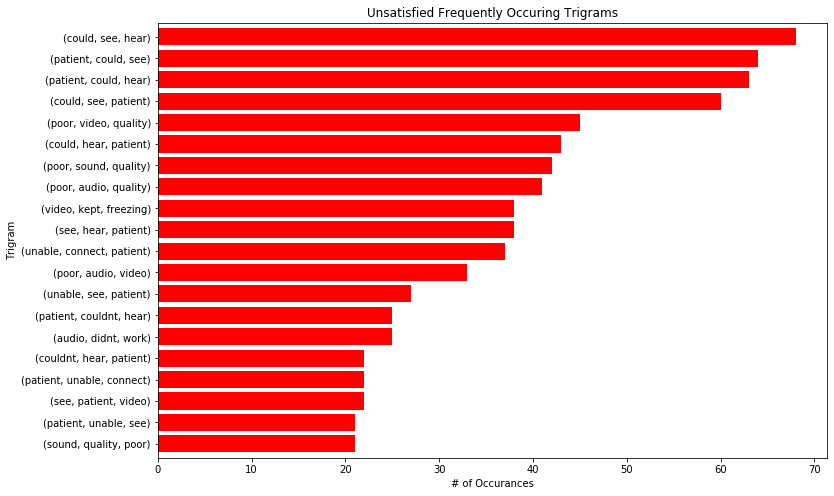

In [78]:
#unsatisfied trigram chart
unsatisfied_trigram_series.sort_values().plot.barh(color='red', width=.8, figsize=(12,8))
plt.title('Unsatisfied Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

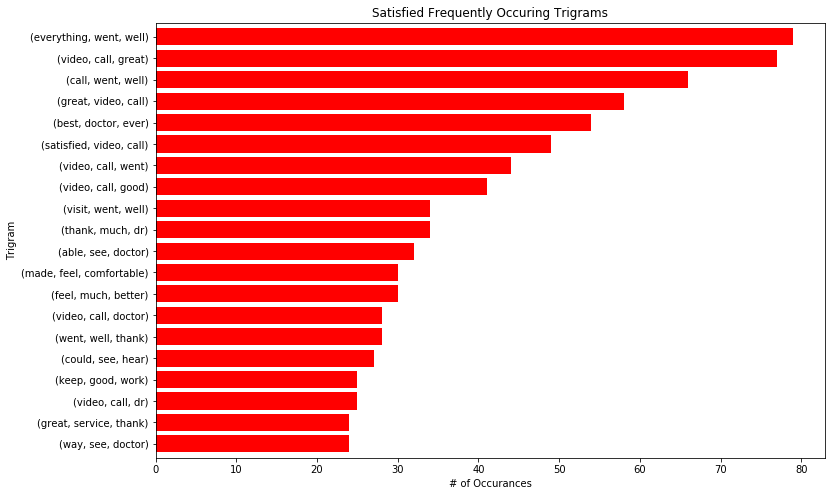

In [79]:
#satisfied trigram chart
satisfied_trigram_series.sort_values().plot.barh(color='red', width=.8, figsize=(12,8))
plt.title('Satisfied Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [ ]:
#number of disconnections, join survey_data on visit_id and participant_type
#survey data left join participant visit on survey_data.visit_id = participant_visit.visit_id AND 
#survey_data.participant_type = participant_visit.participant_type
#top 10 satisfied feedback, unsatisfied feedback - percentages of occurences - define categories of issues, row by row write a function that takes in feedback -> output the category of problem

#phase 1 - define functions that will classify feedback text - audio, video, connection issues (product, experience) 
#phase 2 - define methods to classify categories through what the data tells us(N-grams, value_counts)

In [ ]:
participant_data = pd.read_csv(r'G:\Shared drives\MediSprout\vishaal\MediSprout-notebooks\NLP Analysis\v2md_v2_1_participant_visit.csv')
participant_data